<a href="https://colab.research.google.com/github/thanhlamnguyen/lam/blob/main/Gradient_descent_cho_h%E1%BB%93i_quy_tuy%E1%BA%BFn_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("Advertising.csv")
data.head(10)

,Unnamed: 0,Radio,Sales
0,1,37.8,22.1
1,2,39.3,10.4
2,3,45.9,9.3
3,4,41.3,18.5
4,5,10.8,12.9
5,6,48.9,7.2
6,7,32.8,11.8
7,8,19.6,13.2
8,9,2.1,4.8
9,10,2.6,10.6


In [4]:
X = data["Radio"].values
y= data["Sales"].values

In [5]:
X

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7,  8.4,
       25.7, 22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8,
       49.4, 28.1, 19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3,
       24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 24.6, 43.7,  1.6,
       28.5, 29.9,  7.7, 26.7,  4.1, 20.3, 44.5, 43. , 18.4, 27.5, 40.6,
       25.5, 47.8,  4.9,  1.5, 33.5, 36.5, 14. , 31.6,  3.5, 21. , 42.3,
       41.7,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,  0.4, 26.9,
        8.2, 38. , 15.4, 20.6, 46.8, 35. , 14.3,  0.8, 36.9, 16. , 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. , 39.6,  2.9,
       27.2, 33.5, 38.6, 47. , 39. , 28.9, 25.9, 43.9, 17. , 35.4, 33.2,
        5.7, 14.8,  1.9,  7.3, 49. , 40.3, 25.8, 13

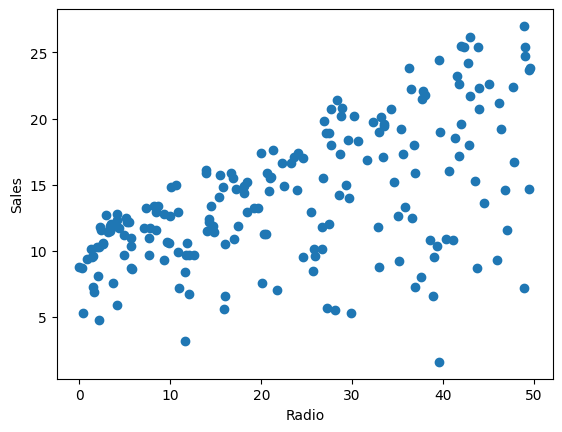

In [6]:
# Trực quan hoá dữ liệu
plt.scatter(X, y, marker='o')
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

In [7]:
# Hàm dự đoán
def predict(X, weight, bias):
    return weight * X + bias

In [8]:
# Hàm tính Cost Function
def costFunction(X, y, weight, bias):
    n = len(X)
    sum_err = 0

    for i in range(n):
        sum_err += (y[i] - (weight * X[i] + bias))**2

    return sum_err / n

In [9]:
# Hàm cập nhật weight và bias bằng gradient descent
def updateWeightBias(X, y, weight, bias, learning_rate):
    n = len(X)
    weight_temp = 0
    bias_temp = 0

    for i in range(n):
        weight_temp += -2 * X[i] * (y[i] - (weight * X[i] + bias))
        bias_temp += -2 * (y[i] - (weight * X[i] + bias))

    weight -= (weight_temp / n) * learning_rate
    bias -= (bias_temp / n) * learning_rate

    return weight, bias


In [10]:
# Hàm huấn luyện
def train(X, y, weight, bias, learning_rate, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        weight, bias = updateWeightBias(X, y, weight, bias, learning_rate)
        cost = costFunction(X, y, weight, bias)
        cost_history.append(cost)

    return weight, bias, cost_history


In [11]:
# Thực hiện huấn luyện
learning_rate = 0.0013101
num_iterations = 1000
theta = np.random.rand(2)
weight, bias, cost_history = train(X, y, theta[0],theta[1], learning_rate, num_iterations)

In [12]:
# In kết quả
print("Hệ số (weight):", weight)
print("Bias:", bias)

Hệ số (weight): 0.33111002706926923
Bias: 5.074573098888751


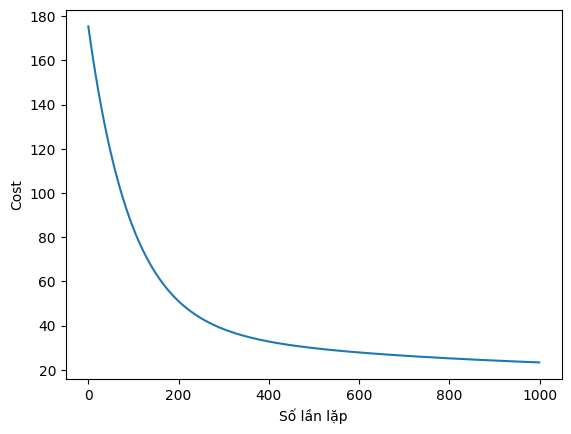

In [207]:
# Trực quan hoá lịch sử cost
plt.plot(range(num_iterations), cost_history)
plt.xlabel("Số lần lặp")
plt.ylabel("Cost")
plt.show()

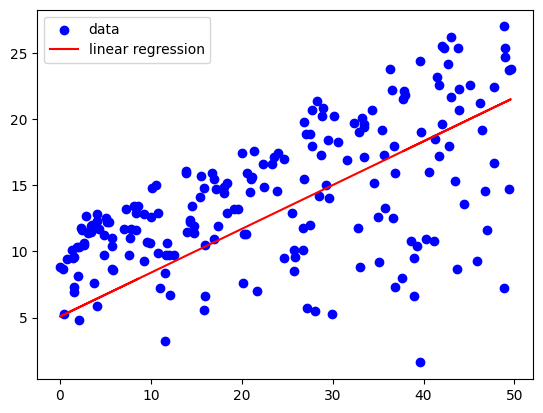

In [18]:
plt.scatter(X, y, color="blue", label="data")
plt.plot(X, predict(X, weight, bias), color="red", label="linear regression")
plt.legend()

In [82]:
# Dự đoán giá trị mới
Radio_value = 10
prediction = predict(Radio_value, weight, bias)
print("Giá trị dự đoán:", prediction)

Giá trị dự đoán: 5.246381231280658
